In [1]:
#Exploratory Data Analysis
import pandas as pd
import seaborn as sns

In [2]:
credit_data= pd.read_csv('Credit Score Classification Dataset.csv')

In [3]:
credit_data.dropna(inplace=True)

In [4]:
credit_data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [5]:
x=credit_data[['Age',	'Gender',	'Income',	'Education', 'Marital Status',	'Number of Children',	'Home Ownership']].values

In [6]:
x

array([[25, 'Female', 50000, ..., 'Single', 0, 'Rented'],
       [30, 'Male', 100000, ..., 'Married', 2, 'Owned'],
       [35, 'Female', 75000, ..., 'Married', 1, 'Owned'],
       ...,
       [39, 'Female', 62500, ..., 'Married', 2, 'Owned'],
       [44, 'Male', 87500, ..., 'Single', 0, 'Owned'],
       [49, 'Female', 77500, ..., 'Married', 1, 'Owned']], dtype=object)

In [7]:
y=credit_data[['Credit Score']].values

In [8]:
y

array([['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Average'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Average'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Average'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Average'],
       ['High'],
       ['High'],
    

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder_x=LabelEncoder()

In [11]:
x[: , 1]=label_encoder_x.fit_transform(x[: , 1])
x[: , 3]=label_encoder_x.fit_transform(x[: , 3])
x[: , 4]=label_encoder_x.fit_transform(x[: , 4])
x[: , 6]=label_encoder_x.fit_transform(x[: , 6])

In [12]:
x

array([[25, 0, 50000, ..., 1, 0, 1],
       [30, 1, 100000, ..., 0, 2, 0],
       [35, 0, 75000, ..., 0, 1, 0],
       ...,
       [39, 0, 62500, ..., 0, 2, 0],
       [44, 1, 87500, ..., 1, 0, 0],
       [49, 0, 77500, ..., 0, 1, 0]], dtype=object)

In [13]:
labelencoder_y=LabelEncoder()

In [14]:
y=labelencoder_y.fit_transform(y)

c:\Users\aadri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 1])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
credit_data[['Age','Income','Number of Children']]=scaler.fit_transform(credit_data[['Age','Income','Number of Children']])

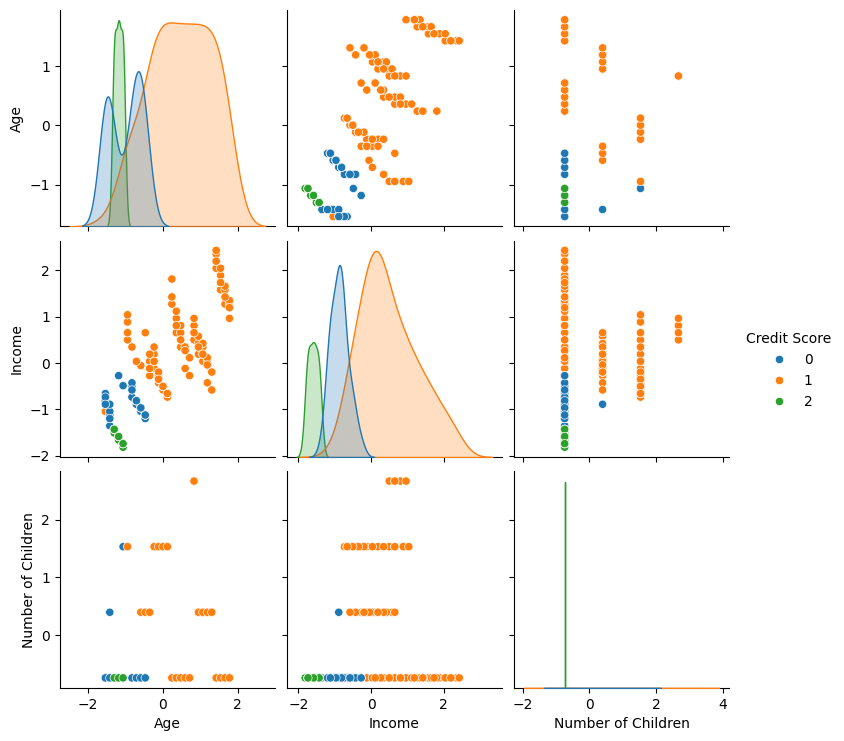

In [17]:
credit_data['Credit Score']=pd.Series(y)
sns.pairplot(credit_data,hue='Credit Score',palette='tab10')

In [18]:
#Training Classical Model
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 12345
train_features, test_features, train_labels, test_labels = train_test_split(
    x,y, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [19]:
from sklearn.svm import SVC

svc=SVC()
_=svc.fit(train_features,train_labels)

In [20]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=5, kernel='rbf', gamma=15)
X_train_kpca = kpca.fit_transform(train_features)
X_test_kpca = kpca.transform(test_features)

In [22]:
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

def create_fm(num_features, fm_type, reps, entanglement):
    if not isinstance(num_features, int) or num_features <= 0:
        raise ValueError("num_features must be a positive integer.")
    if not isinstance(reps, int) or reps <= 0:
        raise ValueError("reps must be a positive integer.")
    if not isinstance(entanglement, (str, list)):
        raise ValueError("entanglement must be a string or a list of tuples.")
    
    if fm_type == 'ZZFeatureMap':
        fm = ZZFeatureMap(feature_dimension=num_features, reps=reps, entanglement=entanglement)
    elif fm_type == 'PauliFeatureMap':
        fm = PauliFeatureMap(feature_dimension=num_features, reps=reps, entanglement=entanglement, paulis=['Z', 'X', 'Y'])
    elif fm_type == 'ZZPauliMap':
        zz_fm = ZZFeatureMap(feature_dimension=num_features, reps=reps, entanglement=entanglement)
        pauli_fm = PauliFeatureMap(feature_dimension=num_features, reps=reps, entanglement=entanglement, paulis=['Z', 'X', 'Y'])
        
        pauli_params = ParameterVector('p', pauli_fm.num_parameters)
        pauli_fm = pauli_fm.assign_parameters(pauli_params)
        
        fm = zz_fm.compose(pauli_fm)
    else:
        raise ValueError("Unsupported feature map type. Use 'ZZFeatureMap', 'PauliFeatureMap', or 'ZZPauliMap'.")

    return fm

def get_user_input():
    fm_type = input("Enter the feature map type (ZZFeatureMap, PauliFeatureMap, ZZPauliMap): ").strip()
    reps = int(input("Enter the number of repetitions (reps): ").strip())
    entanglement = input("Enter the entanglement type (full, linear) or list of tuples (e.g., [(0,1),(1,2)]): ").strip()
    
    if entanglement.lower() in ['full', 'linear']:
        entanglement = entanglement.lower()
    else:
        try:
            entanglement = eval(entanglement)
            if not isinstance(entanglement, list):
                raise ValueError
        except:
            raise ValueError("Invalid format for entanglement. Use 'full', 'linear' or a list of tuples.")

    return fm_type, reps, entanglement

num_features = x.shape[1]  

fm_type, reps, entanglement = get_user_input()

fm = create_fm(num_features, fm_type=fm_type, reps=reps, entanglement=entanglement)
print('    ',fm_type)
print('')
print(fm)


     ZZPauliMap

     ┌───────────────────────────────────────────────────┐»
q_0: ┤0                                                  ├»
     │                                                   │»
q_1: ┤1                                                  ├»
     │                                                   │»
q_2: ┤2                                                  ├»
     │                                                   │»
q_3: ┤3 ZZFeatureMap(x[0],x[1],x[2],x[3],x[4],x[5],x[6]) ├»
     │                                                   │»
q_4: ┤4                                                  ├»
     │                                                   │»
q_5: ┤5                                                  ├»
     │                                                   │»
q_6: ┤6                                                  ├»
     └───────────────────────────────────────────────────┘»
«     ┌──────────────────────────────────────────────────────┐
«q_0: ┤0            

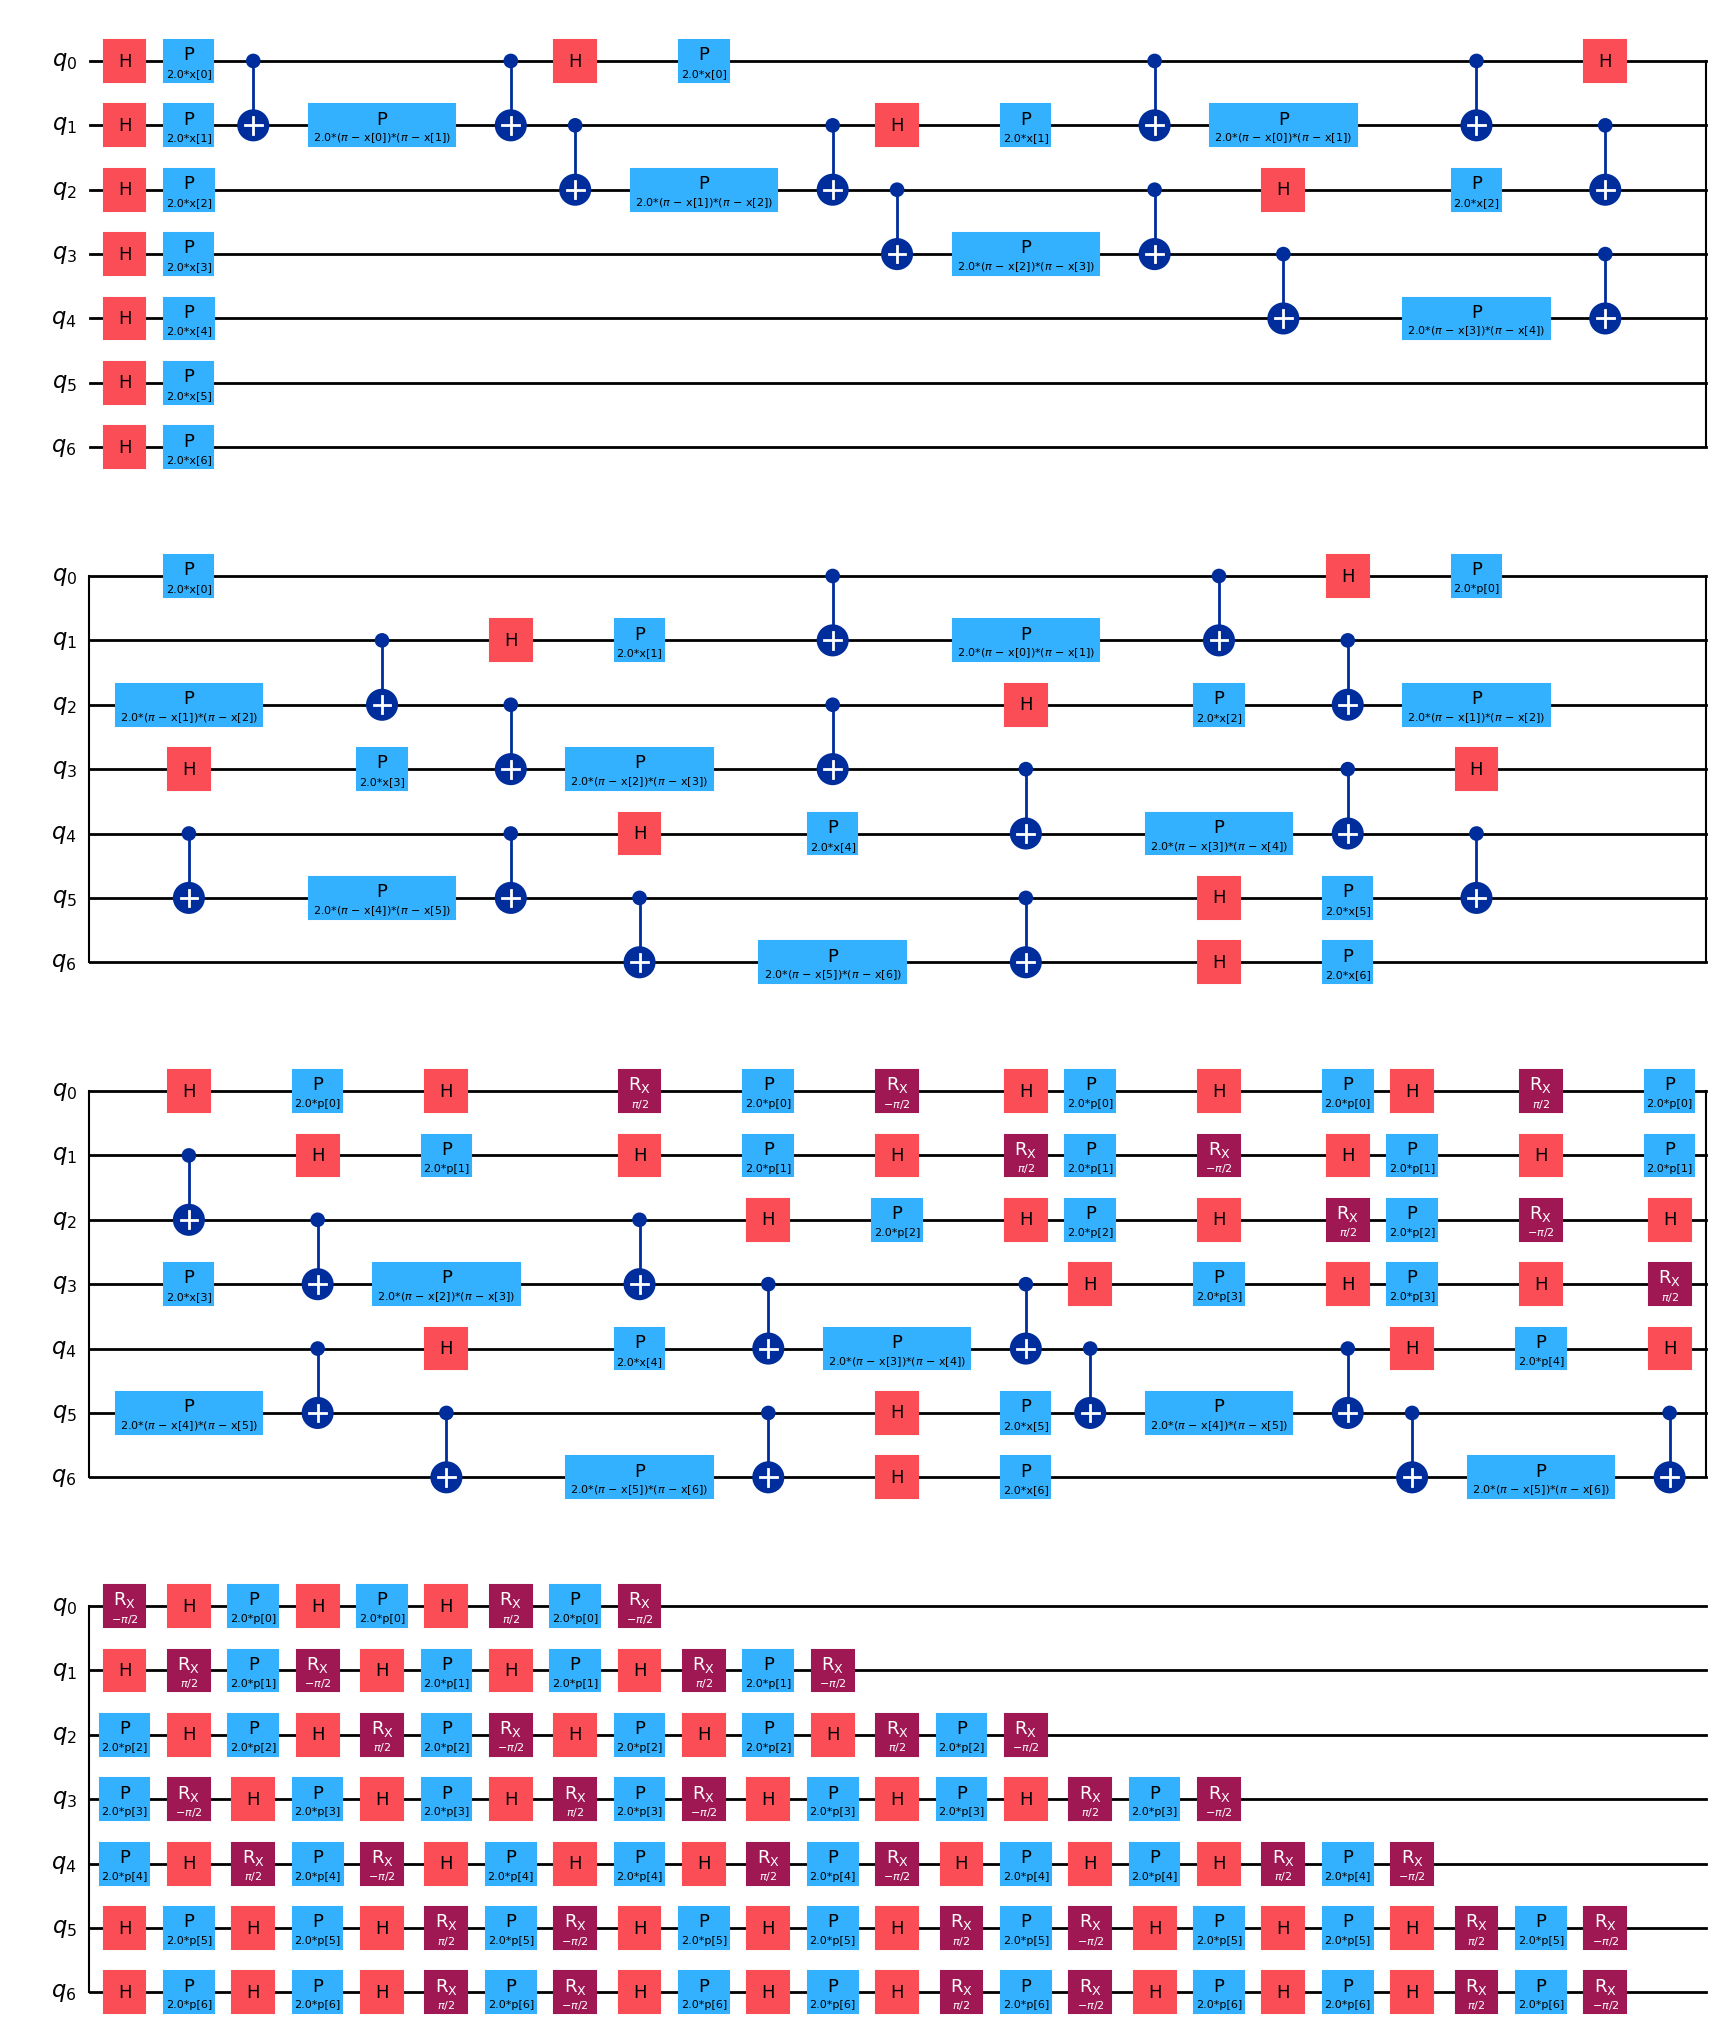

In [23]:
fm.decompose().draw(output='mpl')

In [24]:
#Training a QML Model
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

num_features = x.shape[1]

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=fm)

In [25]:
from sklearn.base import BaseEstimator
from scipy.special import softmax

class QSVCWrapper(BaseEstimator):
    def __init__(self, best_model):
        self.best_model = best_model

    def predict_proba(self, X):
    
        scores = self.best_model.decision_function(X)
        return softmax(scores, axis=1)

In [26]:
from qiskit_machine_learning.algorithms import QSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
#QSVC with cross validation and hyperparametric tuning
qsvc = QSVC(quantum_kernel=adhoc_kernel, probability=True)
search_space = {'C': [10]}
stratifiedkfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
opt = GridSearchCV(qsvc, search_space, cv=stratifiedkfold)
opt.fit(X_train_kpca, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=QSVC(C=1.0, break_ties=False, cache_size=200,
                            class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3,
                            gamma='scale', max_iter=-1, probability=True,
                            quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x000001D71BA037D0>,
                            random_state=12345, shrinking=True, tol=0.001,
                            verbose=False),
             param_grid={'C': [10]})

In [27]:
best_model = opt.best_estimator_
accuracy = best_model.score(X_test_kpca, test_labels)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8484848484848485


In [39]:
best_model.predict([X_test_kpca[0]])


array([1])

In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

y_probs = best_model.predict_proba(X_test_kpca)  
encoder = OneHotEncoder(sparse_output=False)
y_test_encoded = encoder.fit_transform(test_labels.reshape(-1, 1))

auc_score = roc_auc_score(y_test_encoded, y_probs, average='macro', multi_class='ovr')
print(f'ROC AUC Score: {auc_score:.3f}')


NameError: name 'best_model' is not defined

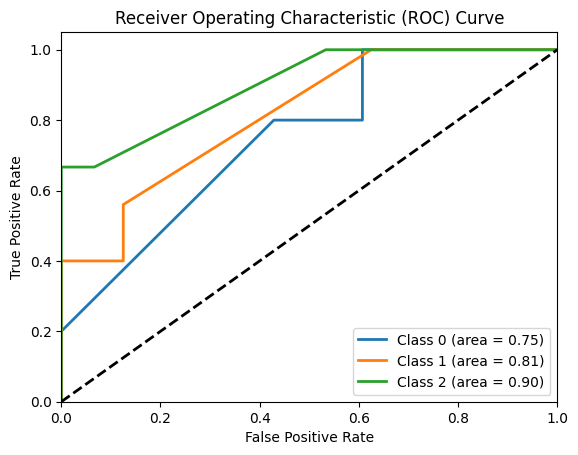

In [45]:
n_classes = y_test_encoded.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_encoded[:, i], y_probs[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
model_wrapper = QSVCWrapper(best_model)

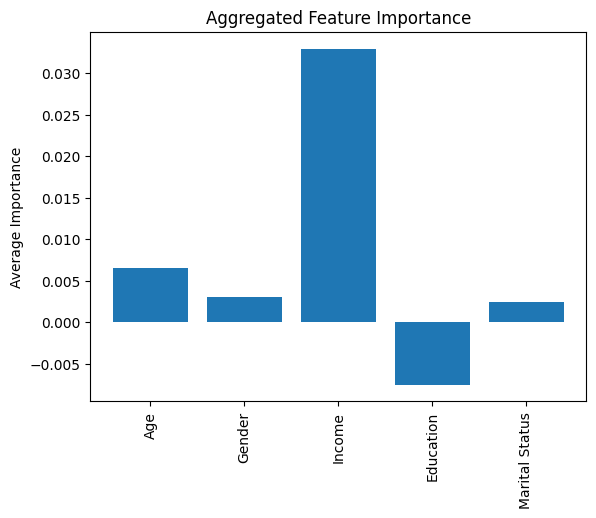

In [32]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

feature_names = ['Age',	'Gender', 'Income', 'Education', 'Marital Status'] #For 5 features

explainer = LimeTabularExplainer(X_train_kpca, training_labels=train_labels, feature_names=feature_names, mode='classification')

num_instances = len(X_test_kpca)  

feature_importances = np.zeros(len(feature_names))

for i in range(num_instances):
    exp = explainer.explain_instance(X_test_kpca[i], model_wrapper.predict_proba, num_features=len(feature_names), num_samples=100)
    explanation = exp.as_list()
    
    for feature, importance in explanation:
      
        for index, name in enumerate(feature_names):
            if feature.startswith(name):
                feature_importances[index] += importance
                break

feature_importances /= num_instances

plt.bar(feature_names, feature_importances)
plt.ylabel('Average Importance')
plt.title('Aggregated Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [33]:
feature_tuples = list(zip(feature_names, feature_importances))
print("Feature importances (feature, average importance):")
for feature_tuple in feature_tuples:
    print(feature_tuple)

Feature importances (feature, average importance):
('Age', 0.006579232399180595)
('Gender', 0.002983247753641642)
('Income', 0.03297370967030605)
('Education', -0.007531486537795367)
('Marital Status', 0.002446053299379094)


In [34]:
for feature_names, feature_importances in feature_tuples:
    print(f"{feature_names}: {feature_importances:.3f}")

Age: 0.007
Gender: 0.003
Income: 0.033
Education: -0.008
Marital Status: 0.002
